# Sect 40: Neural Networks - Intro to Deep Learning


- 10/30/20
- online-ds-pt-041320

## Learning Objectives

- Start By Discussing Biological Neural Networks (powerpoint)
- Connect back to introduction from Learn
- Demonstrate / play with Neural Network with Tensorflow Playground

## Questions/ Comments


# Biological Neural Networks

<img src="https://raw.githubusercontent.com/jirvingphd/my-best-lessons-and-code-jmi/main/Images/Brainbow-Hippocampus-rainbow-colors-large.jpg" width=60%>




> See `sect_40_bio_neural_networks_v2.pptx` for introduction to how biological neurons work. 


# Artificial Neural Networks 

    
- **The purpose of a neural network is to model $\hat y \approx y$ by minimizing loss/cost functions using gradient descent.**

- Neural networks are very good with unstructured data. (images, audio)

- **Networks are comprised of sequential layers of neurons/nodes.**
    - Each neuron applies a **linear transformation** and an **activation function** and outputs its results to all neurons in the next layer.
    - Minimizing Loss functions by adjusting parameters (weights and bias) of each connection using gradient descent (forward and back propagation).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-neural-networks-online-ds-ft-100719/master/images/new_first_network_num.png" width=80%>

- **Activation functions** control the output of a neuron.($\hat y =f_{activation}(x)$ )
    - Most basic activation function is sigmoid functin ($\hat y =\sigma(x)$)
    - Choice of activation function controls the size/range of the output.
    
    
    
- **Linear transformations** ( $z = w^T x + b$ ) are used control the output of the activation function .
    - where $w^T $ is the weight(/coefficient), $x$ is the input, and  $b$ is a bias. 
        - weights: 
        - bias:
        
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg.png">



- **Loss functions** ($\mathcal{L}(\hat y, y) $)  measure inconsistency between predicted ($\hat y$) and actual $y$
    - will be optimized using gradient descent
    - defined over 1 traning sample
    
    
- **Cost functions** takes the average loss over all of the samples.
    - $J(w,b) = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$
    - where $l$ is the number of samples
    

#### A Note On Shapes

- Inputs:
    - $n$: Number of inputs (columns) in the feature vector 
    - $l$: Number of items (rows) in the training set 
    - $m$: Number of items (rows) in the test set
    
    
- Input X:
    - Will have shape $n$ x $l$ (number of features x number of training data points/rows)

### Training ANNs
- **Forward propagation** is the calculating  loss and cost functions.


- **Back propagation** involves using gradient descent to update the values for  $w$ and $b$.
    - $w := w- \alpha\displaystyle \frac{dJ(w)}{dw}$ <br><br>
    - $b := b- \alpha\displaystyle \frac{dJ(b)}{db}$

        - where $ \displaystyle \frac{dJ(w)}{dw}$ and $\displaystyle \frac{dJ(b)}{db}$ represent the *slope* of the function $J$ with respect to $w$ and $b$ respectively
        - $\alpha$ denote the *learning rate*. 
        
        
        
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/neural_network_steps.png">

### Using the chain rule for updating parameters with sigmoid activation function example:
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg_deriv.png" >
- $\displaystyle \frac{dJ(w,b)}{dw_i} = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} \frac{d\mathcal{L}(\hat y^{(i)}, y^{(i)})}{dw_i}$
 
 
- For each training sample $1,...,l$ you'll need to compute:

    - $ z^{(i)} = w^T x^ {(i)} +b $

    - $\hat y^{(i)} = \sigma (z^{(i)})$

    - $dz^{(i)} = \hat y^{(i)}- y^{(i)}$

- Then, you'll need to make update:

    - $J_{+1} = - [y^{(i)} \log (\hat y^{(i)}) + (1-y^{(i)}) \log(1-\hat y^{(i)})$ (for the sigmoid function)

    - $dw_{1, +1}^{(i)} = x_1^{(i)} * dz^{(i)}$

    - $dw_{2, +1}^{(i)} = x_2^{(i)} * dz^{(i)}$

    - $db_{+1}^{(i)} =  dz^{(i)}$

    - $\dfrac{J}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{dw_1}{m}$, $\dfrac{db}{m}$

- After that, update: 

    $w_1 := w_1 - \alpha dw_1$

    $w_2 := w_2 - \alpha dw_2$

    $b := b - \alpha db$

    repeat until convergence!
    
    

# Intro to Keras


## Keras Basics

- Tensors dimensions:
    - Scalars = 0D tensors
    - Vectors = 1D tensors
    - Matrices = 2D tensors
    - 3D tensors
- A tensor is defined by 3 characteristics:
    - rank or number of axes
    - the shape
    - the data type
- Tensor basics - properties (from [here](https://pgaleone.eu/tensorflow/2018/07/28/understanding-tensorflow-tensors-shape-static-dynamic/#tensors-the-basic)):
    - name
    - type:
        - tf.float32, tf.int64, tf.string
    - rank:
        - the number of dimension or the tensor. 
        - scalar = 0, vector = 1, etc.
    - shape:

### Important Data Manipulations in numpy

- **Unrowing matrices:**
    - e.g. turning a matrix of 790 images, which are 64 x 64 pixels and in RBG (3 colors) a (790, 64, 64, 3) matrix  into a matrix with 1 row for each image a ( 64*64*3, 790) matrix
    - img_unrow = img.reshape(790, -1).T
        - reshape -1 essentially means "figure out how many, based upon the dat'
- **Increasing the rank:**
    - Vector with `np.shape()` returns  `(790,)`
    - `np.reshape(vector, (1, 790))`
- **Tensor indexling/slicing**
    - just as python, `tensor[start_idx : end_idx]`
    - left inclusive, right exclusive

In [ ]:
## UPDATE TO TENSORFLOW 2.0
# !pip install -U tensorflow

In [4]:
## SET RANDOM SEETS FOR CONSISTENT RESULTS
import numpy as np
np.random.seed(123)

import tensorflow as tf
tf.random.set_seed(321)
print(tf.__version__)

2.3.1


In [5]:
# Tensor indexing example using images
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline  

Raw Tensor shape: (60000, 28, 28)
Single Image shape (28, 28)


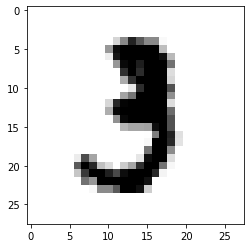

In [6]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[10] #Select an arbitrary case for our example

#Checking the shape of our tensor (in this case, the image)
print('Raw Tensor shape:', train_images.shape)

#Now performing some slices of our image:
print('Single Image shape', train_images[0].shape)


plt.imshow(digit, cmap=plt.cm.binary) #Display an example image for context
plt.show()

## Basics of Building a Neural Network with Keras:


#### Basics of Building a Neural Network with Keras
1. Import required modules 
2. Decide on a network architecture (have only discussed sequential thus far)
3. Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.
4. Compile the model:
    - Specify optimiziers
    - specify loss functions
    - specify metrics

In [7]:
len(train_images), len(test_images)

(60000, 10000)

In [9]:
train_images[0].shape

(28, 28)

In [11]:
## Reshape images as (num_images,-1)
train_img_unrow = train_images.reshape(len(train_images),-1)
test_img_unrow =  test_images.reshape(len(test_images),-1)
train_img_unrow.shape

(60000, 784)

In [13]:
train_img_unrow[0].shape

(784,)

In [14]:
## Scale the data
train_img_unrow = train_img_unrow/255.
test_img_unrow = test_img_unrow/255.

In [15]:
## check train_img_unrow shape
train_img_unrow[0].shape

(784,)

In [18]:
train_labels.shape

(60000,)

In [19]:
from tensorflow.keras.utils import to_categorical
## Prepare y_train and y_train using to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [20]:
## Check the shape of y_train
y_train.shape

(60000, 10)

In [25]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array

9


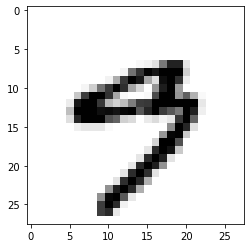

In [33]:
i = np.random.choice(range(len(train_labels)))
plt.imshow(train_images[i], cmap=plt.cm.binary) 

print(train_labels[i])

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
## Print y_train shape
print(y_train.shape)
## Save the number of cols as n_classes
n_classes = y_train.shape[1]
n_classes

(60000, 10)


10

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


## Make a Sequential Model:
model = models.Sequential()

## Add a Hidden layer of 10 units with relu activation function
model.add( layers.Dense(10,activation='relu',
          input_shape=train_img_unrow[0].shape))

## Add final layer with the number of classes in our target (use activation='softmax')
model.add( layers.Dense(10, activation='softmax'))

## Compile with optimer as adam, loss as categorical_crossentropy,
# and accuracy as metric
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])


## Check out the model's summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


#### 5. Training the model
- `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`

    - **batches:**
        - a set of N samples, processed independently in parallel
        - a batch determines how many samples are fed through before back-propagation. 
        - model only updates after a batch is complete.
        - ideally have as large of a batch as your hardware can handle without going out of memory.
            - larger batches usually run faster than smaller ones for evaluation/prediction. 
    - **epoch:**
        - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
        - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
        - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

    - **`history =  model.fit()` creates history object with .history attribute.**
        - `history.history()` returns a dictionary of metrics from each epoch. 
            - `history.history['loss']` and `history.history['acc']`



In [36]:
# Fitting the model (10 epochs, batch size=64, test data as validation data)
history = model.fit(train_img_unrow,y_train, epochs=10,batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 1s 1ms/step - loss: 0.6757 - accuracy: 0.8087 - val_loss: 0.3387 - val_accuracy: 0.9091
Epoch 2/10
750/750 [==============================] - 1s 981us/step - loss: 0.3234 - accuracy: 0.9096 - val_loss: 0.2826 - val_accuracy: 0.9240
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.2860 - accuracy: 0.9193 - val_loss: 0.2651 - val_accuracy: 0.9243
Epoch 4/10
750/750 [==============================] - 1s 967us/step - loss: 0.2690 - accuracy: 0.9232 - val_loss: 0.2567 - val_accuracy: 0.9277
Epoch 5/10
750/750 [==============================] - 1s 946us/step - loss: 0.2574 - accuracy: 0.9265 - val_loss: 0.2488 - val_accuracy: 0.9292
Epoch 6/10
750/750 [==============================] - 1s 981us/step - loss: 0.2491 - accuracy: 0.9291 - val_loss: 0.2462 - val_accuracy: 0.9302
Epoch 7/10
750/750 [==============================] - 1s 976us/step - loss: 0.2417 - accuracy: 0.9315 - val_loss: 0.2427 - val_accuracy: 0.9

### Evaluate ANN Results

In [38]:
## Visualzie the training history 
history_df =pd.DataFrame(history.history)
# first make it a df
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.675730,0.808708,0.338685,0.909083
1,0.323417,0.909563,0.282649,0.924000
2,0.285952,0.919333,0.265145,0.924333
3,0.268971,0.923167,0.256745,0.927667
4,0.257436,0.926521,0.248806,0.929167


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

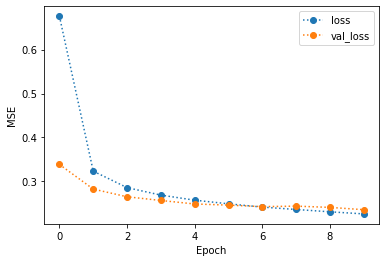

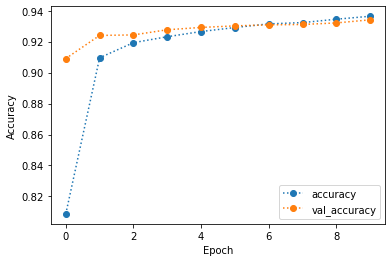

In [40]:
plot_kws = dict(marker='o',ls=':')
## Plot Losses

ax1 = history_df[[c for c in history_df.columns if 'loss' in c]].plot(**plot_kws)
ax1.set(xlabel='Epoch',ylabel='MSE')

## Plot accuracy
ax2 = history_df[[c for c in history_df.columns if 'acc' in c]].plot(**plot_kws)
ax2.set(xlabel='Epoch',ylabel='Accuracy')

In [43]:
## Get pred
y_hat_test = model.predict(test_img_unrow)
y_hat_test[0].argmax()

7

In [46]:
y_pred = y_hat_test.argmax(axis=1)
y_pred[:5]

array([7, 2, 1, 0, 4])

In [45]:
y_true = y_test.argmax(axis=1)
y_true[:5]

array([7, 2, 1, 0, 4])

In [48]:
## Print CLassification Report
from sklearn import metrics
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.93      0.93      1032
           3       0.92      0.89      0.91      1010
           4       0.92      0.95      0.94       982
           5       0.89      0.88      0.89       892
           6       0.93      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.91      0.90      0.90       974
           9       0.94      0.91      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



<AxesSubplot:>

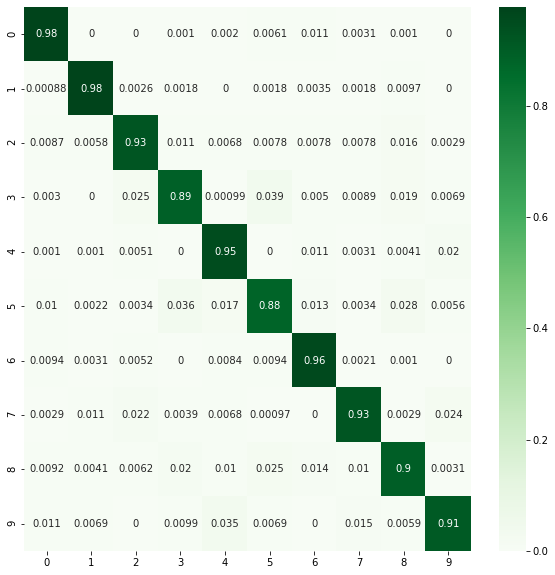

In [51]:
## Get the confusion matrix 
cm = metrics.confusion_matrix(y_true,y_pred,normalize='true')
## Plot the confusion Matrix
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, cmap='Greens',annot=True,ax=ax)

>### Next class: Deep Neural Networks
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-neural-networks-onl01-dtsc-ft-070620/master/images/Deeper_network.jpg">

# APPENDIX

## Activation Functions (will call $f_a$ here)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from functions import *

- **sigmoid:**<br>
<!-- <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_33_1.png" width=200> -->
    - $ f_a=\dfrac{1}{1+ \exp(-z)}$
    - outputs 0 to +1
    

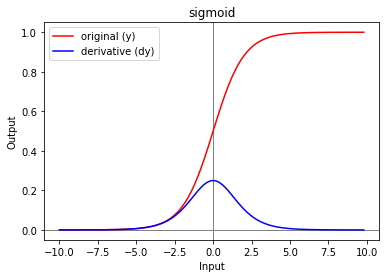

In [2]:
plot_activation(sigmoid)

- **tanh (hyperbolic tan):**<br>
    - $f_a = =\dfrac{\exp(z)- \exp(-z)}{\exp(z)+ \exp(-z)}$
    - outputs -1 to +1
    - Generally works well in intermediate layers
    - one of most popular functions
    

In [ ]:
plot_activation(tanh)

- **arctan**
    -  similar qualities as tanh, but slope is more gentle than tanh
    - outputs ~ 1.6 to 1.6
    

In [ ]:
plot_activation(arctan)

-  **Rectified Linear Unit (relu):**<br>
    - most popular activation function
    - Activation is exactly 0 when Z <0
    - Makes taking directives slightly cumbersome
    - $f_a=\max(0,z)$
    

In [ ]:
plot_activation(relu)

- **leaky_relu:**
    -  altered version of relu where the activatiom is slightly negative when $z<0$
    - $f_a=\max(0.001*z,z)$

In [ ]:
plot_activation(leaky_relu)